#Loading, Cleaning, and Visualization

###Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/IntroToDataScience-SamanthaMathieu/Project 3/data/cleaned_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,18,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,22,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,21,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,19,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,16,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957


In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'urine protein',
       'serum creatinine', 'AST', 'ALT', 'ggt', 'dental caries', 'tartar',
       'smoking', 'bmi', 'upcratio', 'LDLratio', 'HDLratio'],
      dtype='object')

In [ ]:
df['relaxation']

0        73
1        70
2        86
3        60
4        74
         ..
55687    68
55688    62
55689    72
55690    76
55691    75
Name: relaxation, Length: 55692, dtype: int64

## Age interaction

In [ ]:
under_30_df = df[df['age'] < 30]
over_60_df = df[df['age'] > 60]
_30_60_df = df[(df['age'] >= 30) & (df['age'] <= 60)]

under_30_smokers_df = under_30_df[under_30_df['smoking'] == 1]
under_30_nonsmokers_df = under_30_df[under_30_df['smoking'] == 0]

over_60_smokers_df = over_60_df[over_60_df['smoking'] == 1]
over_60_nonsmokers_df = over_60_df[over_60_df['smoking'] == 0]

_30_60_df_smokers_df = _30_60_df[_30_60_df['smoking'] == 1]
_30_60_df_nonsmokers_df = _30_60_df[_30_60_df['smoking'] == 0]

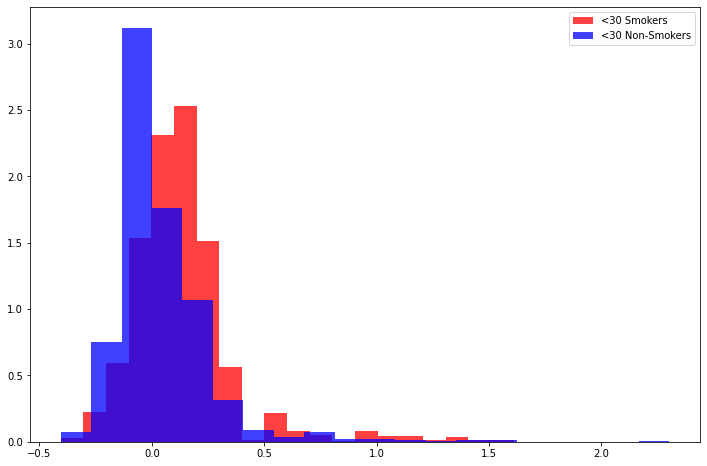

In [ ]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(under_30_smokers_df['upcratio']), color='red', alpha=0.75, label='<30 Smokers', density=True, bins=20)
plt.hist(np.log(under_30_nonsmokers_df['upcratio']), color='blue', alpha=0.75, label='<30 Non-Smokers', density=True, bins=20)
plt.legend();

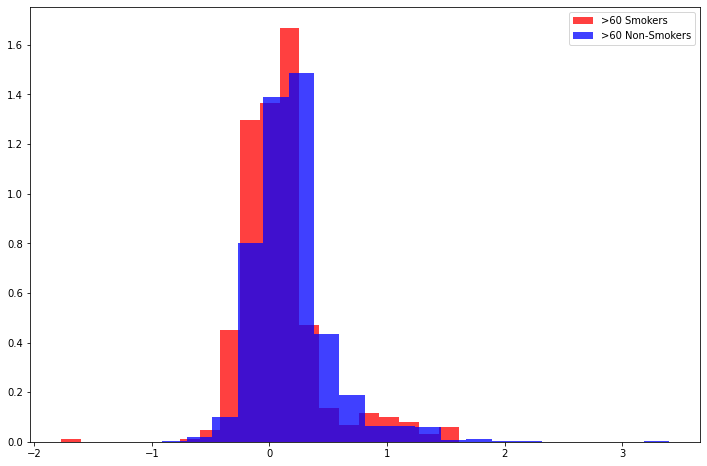

In [ ]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(over_60_smokers_df['upcratio']), color='red', alpha=0.75, label='>60 Smokers', density=True, bins=20)
plt.hist(np.log(over_60_nonsmokers_df['upcratio']), color='blue', alpha=0.75, label='>60 Non-Smokers', density=True, bins=20)
plt.legend();

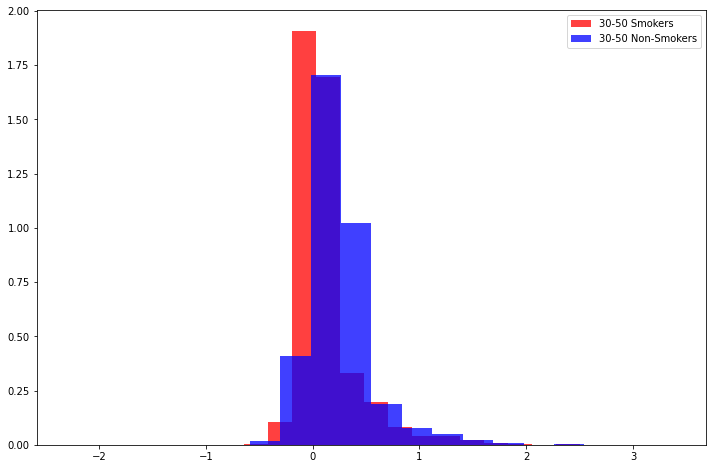

In [ ]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(_30_60_df_smokers_df['upcratio']), color='red', alpha=0.75, label='30-50 Smokers', density=True, bins=20)
plt.hist(np.log(_30_60_df_nonsmokers_df['upcratio']), color='blue', alpha=0.75, label='30-50 Non-Smokers', density=True, bins=20)
plt.legend();

In [ ]:
under_30_smokers_df['upcratio'].value_counts(normalize=True)

1.111111    0.255302
1.000000    0.233279
0.909091    0.154568
1.250000    0.152529
0.833333    0.059951
1.428571    0.057096
0.769231    0.022838
1.666667    0.019984
2.000000    0.008564
2.500000    0.005302
2.222222    0.004894
3.333333    0.003670
3.750000    0.003263
2.727273    0.003263
3.000000    0.003263
1.818182    0.002039
0.714286    0.001631
3.636364    0.001223
0.666667    0.001223
2.857143    0.001223
5.000000    0.001223
1.538462    0.001223
4.444444    0.000816
4.000000    0.000408
3.076923    0.000408
4.285714    0.000408
2.307692    0.000408
Name: upcratio, dtype: float64

In [ ]:
under_30_nonsmokers_df['upcratio'].value_counts(normalize=True)

1.000000     0.253174
1.111111     0.238237
0.909091     0.169529
1.250000     0.144511
0.833333     0.076923
1.428571     0.042569
0.769231     0.025392
1.666667     0.011202
0.714286     0.008962
2.000000     0.005975
1.818182     0.005228
2.222222     0.004481
2.500000     0.002987
2.857143     0.002240
3.000000     0.001494
4.444444     0.001120
4.285714     0.001120
3.333333     0.000747
2.727273     0.000747
4.000000     0.000747
0.666667     0.000747
10.000000    0.000373
1.538462     0.000373
3.636364     0.000373
2.307692     0.000373
5.000000     0.000373
Name: upcratio, dtype: float64

In [ ]:
over_60_smokers_df['upcratio'].value_counts(normalize=True)

1.000000    0.230897
1.111111    0.164452
0.909091    0.157807
1.250000    0.117940
1.428571    0.079734
0.833333    0.061462
0.769231    0.033223
0.714286    0.026578
1.666667    0.021595
0.666667    0.016611
2.500000    0.013289
3.333333    0.011628
3.000000    0.011628
2.000000    0.009967
0.625000    0.008306
2.307692    0.004983
5.000000    0.004983
4.545455    0.003322
3.750000    0.003322
2.857143    0.003322
2.222222    0.001661
3.846154    0.001661
1.578947    0.001661
4.285714    0.001661
0.500000    0.001661
3.076923    0.001661
2.727273    0.001661
2.142857    0.001661
0.169492    0.001661
Name: upcratio, dtype: float64

In [ ]:
over_60_nonsmokers_df['upcratio'].value_counts(normalize=True)

1.250000     0.181377
1.111111     0.163563
1.428571     0.139676
1.000000     0.136032
0.909091     0.093927
1.666667     0.092308
0.833333     0.057490
2.000000     0.030364
0.769231     0.020648
0.714286     0.011741
2.500000     0.009717
0.666667     0.008097
3.333333     0.008097
2.222222     0.005668
4.285714     0.004858
3.000000     0.003644
1.818182     0.003239
2.727273     0.003239
4.000000     0.002429
3.750000     0.002429
2.857143     0.002024
0.588235     0.001619
5.000000     0.001215
5.714286     0.001215
0.625000     0.001215
3.571429     0.001215
6.250000     0.001215
0.500000     0.001215
0.400000     0.000810
2.142857     0.000810
3.636364     0.000810
0.555556     0.000810
4.166667     0.000810
0.675676     0.000810
0.526316     0.000810
30.000000    0.000405
1.923077     0.000405
0.781250     0.000405
1.500000     0.000405
1.470588     0.000405
1.666667     0.000405
0.882353     0.000405
0.952381     0.000405
8.333333     0.000405
8.000000     0.000405
3.846154  

In [ ]:
X = df.drop(columns=df[['smoking','ID']])
y = df['smoking']

In [ ]:
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,ggt,dental caries,tartar,bmi,upcratio,LDLratio,HDLratio
0,0,40,155,60,81.3,1.2,1.0,1,1,114,...,0.7,18,19,27,0,1,0.002497,1.428571,0.586047,0.339535
1,0,40,160,60,81.0,0.8,0.6,1,1,119,...,0.6,22,19,18,0,1,0.002344,1.666667,0.661458,0.218750
2,1,55,170,60,80.0,0.8,0.8,1,1,138,...,1.0,21,16,22,0,0,0.002076,1.000000,0.623967,0.227273
3,1,40,165,70,88.0,1.5,1.5,1,1,100,...,1.0,19,26,18,0,1,0.002571,1.000000,0.701863,0.139752
4,0,40,155,60,86.0,1.0,1.0,1,1,120,...,0.6,16,14,22,0,0,0.002497,1.666667,0.581522,0.336957


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: smoking, dtype: int64

###Logistic Model (all variables)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

logr.fit(X, y)

logr_preds = logr.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df['logr_preds'] = logr_preds

In [ ]:
from sklearn.metrics import r2_score
r2s = r2_score
r2s(y,logr_preds)

-0.2272327605132347

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(logr_preds,y)
mse

0.2851935646053293

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, logr_preds))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     35237
           1       0.63      0.53      0.58     20455

    accuracy                           0.71     55692
   macro avg       0.69      0.68      0.68     55692
weighted avg       0.71      0.71      0.71     55692



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, logr_preds, normalize='true')

array([[0.81982008, 0.18017992],
       [0.46609631, 0.53390369]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

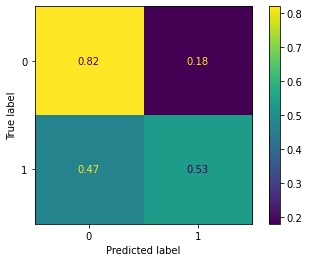

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, logr.predict(X), normalize='true')
plt.show()

###Logistic model with top 3 correlations

In [ ]:
X = df[['gender','hemoglobin','height(cm)']]
y = df['smoking']

In [ ]:
logr = LogisticRegression()

logr.fit(X, y)

logr_preds = logr.predict(X)

In [ ]:
df['logr_preds'] = logr_preds

In [ ]:
r2s = r2_score
r2s(y,logr_preds)

-0.2790016926761678

In [ ]:
mse = mean_squared_error(logr_preds,y)
mse

0.2972240178122531

In [ ]:
print(classification_report(y, logr_preds))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72     35237
           1       0.56      0.87      0.68     20455

    accuracy                           0.70     55692
   macro avg       0.72      0.74      0.70     55692
weighted avg       0.77      0.70      0.71     55692



In [ ]:
confusion_matrix(y, logr_preds, normalize='true')

array([[0.60777024, 0.39222976],
       [0.13356148, 0.86643852]])

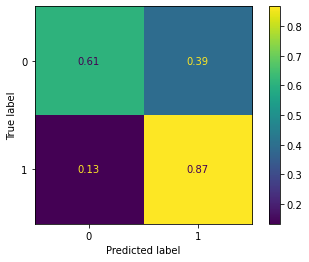

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, logr_preds, normalize='true')
plt.show()

###Nearest Neighbors top three correlated

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
from numpy.matrixlib.defmatrix import N
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
for n_neighbors in [2,5,10,15,20]:
  knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_clf.fit(x_train, y_train)
  y_preds_split = knn_clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds_split))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75     10588
           1       0.56      0.59      0.58      6120

    accuracy                           0.68     16708
   macro avg       0.66      0.66      0.66     16708
weighted avg       0.69      0.68      0.68     16708



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds_split, normalize='true')

array([[0.734983  , 0.265017  ],
       [0.40898693, 0.59101307]])

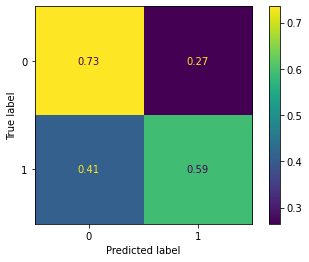

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds_split, normalize='true')
plt.show()

###Logistic split with top three correlated

In [ ]:
logrsplit3 = LogisticRegression()

logrsplit3.fit(x_train, y_train)

logr_preds_split3 = logrsplit3.predict(x_test)

In [ ]:
r2s = r2_score
r2s(y_test,logr_preds_split3)

-0.2897418708070054

In [ ]:
mse = mean_squared_error(logr_preds_split3,y_test)
mse

0.2993775436916447

In [ ]:
print(classification_report(y_test, logr_preds_split3))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72     10588
           1       0.56      0.86      0.68      6120

    accuracy                           0.70     16708
   macro avg       0.72      0.73      0.70     16708
weighted avg       0.76      0.70      0.70     16708



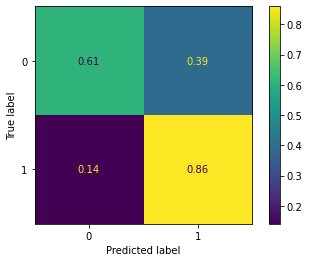

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds_split3, normalize='true')
plt.show()

###Nearest neighbors all variables

In [ ]:
X = df.drop(columns=df[['smoking','ID']])
y = df['smoking']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
for n_neighbors in [2,5,10,15,20]:
  knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_clf.fit(x_train, y_train)
  y_preds_split = knn_clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds_split))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79     10504
           1       0.65      0.51      0.57      6204

    accuracy                           0.72     16708
   macro avg       0.70      0.68      0.68     16708
weighted avg       0.71      0.72      0.71     16708



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds_split, normalize='true')

array([[0.8384425 , 0.1615575 ],
       [0.48807221, 0.51192779]])

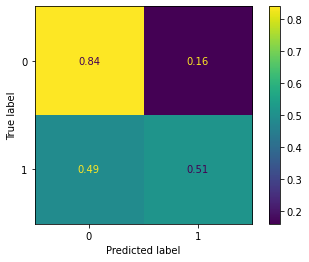

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds_split, normalize='true')
plt.show()

###Logistic with all variables and split

In [ ]:
logrsplit = LogisticRegression()

logrsplit.fit(x_train, y_train)

logr_preds_split = logrsplit.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
r2s = r2_score
r2s(y_test,logr_preds_split)

-0.20220407883668923

In [ ]:
mse = mean_squared_error(logr_preds_split,y_test)
mse

0.2806440028728753

In [ ]:
print(classification_report(y_test, logr_preds_split))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     10504
           1       0.64      0.57      0.60      6204

    accuracy                           0.72     16708
   macro avg       0.70      0.69      0.69     16708
weighted avg       0.71      0.72      0.72     16708



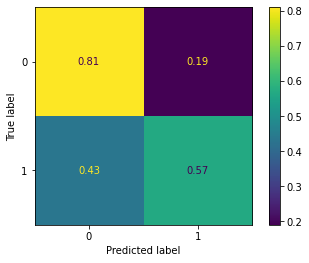

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds_split, normalize='true')
plt.show()

###Make new columns

In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'urine protein',
       'serum creatinine', 'AST', 'ALT', 'ggt', 'dental caries', 'tartar',
       'smoking', 'bmi', 'upcratio', 'LDLratio', 'HDLratio', 'logr_preds'],
      dtype='object')

In [ ]:
df['bmi'] = df['weight(kg)'] / (df['height(cm)'] ** 2)

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio,logr_preds
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535,0
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750,0
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273,1
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752,1
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957,0


In [ ]:
df['upcratio'] = df['urine protein'] / df['serum creatinine']

In [ ]:
df['LDLratio'] = df['LDL'] / df['cholesterol']

In [ ]:
df['HDLratio'] = df['HDL'] / df['cholesterol']

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio,logr_preds
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535,0
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750,0
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273,1
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752,1
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957,0


##Modeling with new columns

In [ ]:
X = df.drop(columns=df[['smoking','ID']])
y = df['smoking']

###Logisitic Model

In [ ]:
logr = LogisticRegression()

logr.fit(X, y)

logr_preds2 = logr.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df['logr_preds2'] = logr_preds2

-0.21502456457033392
0.28235653235653235
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     35237
           1       0.63      0.55      0.59     20455

    accuracy                           0.72     55692
   macro avg       0.70      0.68      0.69     55692
weighted avg       0.71      0.72      0.71     55692



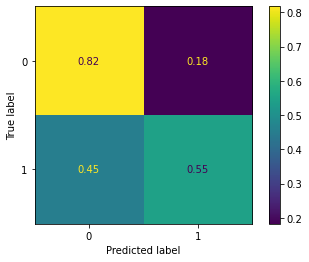

In [ ]:
r2s = r2_score
print(r2s(y,logr_preds2))

mse = mean_squared_error(logr_preds2,y)
print(mse)

print(classification_report(y, logr_preds2))

ConfusionMatrixDisplay.from_predictions(y, logr_preds2, normalize='true')
plt.show()

###Nearest Neighbors 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
for n_neighbors in [2,5,10,15,20]:
  knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_clf.fit(x_train, y_train)
  y_preds_split2 = knn_clf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_preds_split2))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78     10594
           1       0.63      0.51      0.56      6114

    accuracy                           0.71     16708
   macro avg       0.69      0.67      0.67     16708
weighted avg       0.70      0.71      0.70     16708



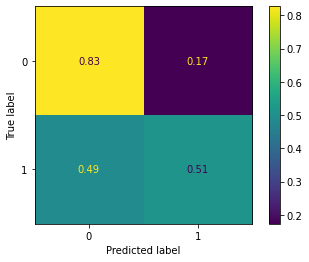

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds_split2, normalize='true')
plt.show()